In [1]:
from PIL import Image, ImageDraw
import os
from pathlib import PurePosixPath
import json
import matplotlib.pyplot as plt

In [2]:
coco_dir = '/Users/nono/Downloads/task_sketchbook 2019.03-2021_03_04_19_01_45-coco 1.0'
images_dir = os.path.join(coco_dir, 'images')
annotations_json = os.path.join(coco_dir, 'annotations/instances_default.json')

In [3]:
annotations = json.load(open(annotations_json))

In [4]:
colors = [(255,0,0), (0,0,255)]
categories = []
for category in annotations['categories']:
    categories.append(category['name'])
categories

['drawing', 'text']

1024 802
935.767545820295 295.53637907912383 58.35014751899866 72.26135002235137
0.9138354939651319 0.36849922578444366 0.05698256593652213 0.0901014339430815
1024 802
642.5062136790344 74.43111309789897 188.75107733571747 218.94923558337058
0.6274474742959321 0.09280687418690645 0.1843272239606616 0.2730040343932302
1024 802
836.5397943674565 36.68455967814037 77.76357621814931 42.06319177469826
0.8169333929369692 0.04574134623209522 0.07594099240053644 0.05244787004326466
1024 802
317.8611354492624 98.05131873044256 146.6833080017881 338.77600357621816
0.3104112650871703 0.12225850215765906 0.1432454179704962 0.4224139695464067
1024 802
237.94152883325881 717.2531783638802 109.04203844434511 43.14349575324095
0.2323647742512293 0.8943306463390028 0.10648636566830577 0.05379488248533784
1024 802
745.940742065266 553.3124720607957 242.78458649977648 133.7379704962003
0.7284577559231113 0.6899158005745583 0.23709432275368797 0.1667555741847884
1024 802
26.545265981224855 596.45596781403

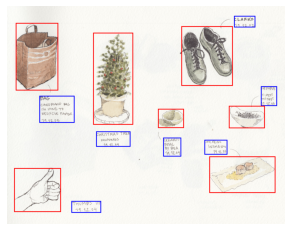

In [8]:
i = 0
for image in annotations['images']:
    if i > 1 - 1:
        continue
        
    # Get image id and filename
    img_id = image['id']
    filename = os.path.join(images_dir, image['file_name'])

    # Load image and resize
    img = Image.open(filename)
    img_width = 1024
    scale_factor = img_width / img.width
    img_height = int(img.height * scale_factor)
    img = img.resize((img_width, img_height))
    
    j = 0
    draw = ImageDraw.Draw(img)

    for anno in annotations['annotations']:
        if anno['image_id'] != img_id:
            continue
        category_index = anno['category_id'] - 1
        bbox = anno['bbox']
        
        x = bbox[0] * scale_factor
        y = bbox[1] * scale_factor
        w = bbox[2] * scale_factor
        h = bbox[3] * scale_factor
        
        print(img_width, img_height)
        print(x,y,w,h)
        print(x/img_width, y/img_height, w/img_width, h/img_height)
        
        # Get category color
        color = colors[category_index]
        
#         # Draw bounding box with corresponding tag color
#         draw.line((x, y, x + w, y), fill=colors[category_index], width=5)
#         draw.line((x + w, y, x + w, y + h), fill=colors[category_index], width=5)
#         draw.line((x + w, y + h, x, y + h), fill=colors[category_index], width=5)        
#         draw.line((x, y + h, x, y), fill=colors[category_index], width=5)      
        
#         # Draw bounding box as polygon
#         draw.polygon([
#             (x, y),
#             (x + w, y),
#             (x + w, y + h),
#             x, y + h,
#             (x, y)
#         ], outline=color)
        
        # Draw bounding box as rectangle
        draw.rectangle([
            (x, y),
            (x + w, y + h)
        ],
        outline=color,
        width=3)
        
        j += 1
#     img.show()
    
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    
    i += 1